Title: Central Limit Theorem
Slug: central-limit-theorem
Summary: Learn about the central limit theorem through code and examples in python
Date: 2018-1-4 18:30  
Category: Math
Subcategory: Descriptive Statistics
PostType: Article
Keywords: central limit theorem python
Tags: z-score, statistics, standard deviation, normal distribution, python, central limit theorem
Authors: Dan Friedman

The **central limit theorem** is a statistcal theory that means if we take a sufficient number of random samples of sufficient sizes from any type of distribution with some variance, the distribution of the sample means will be a normal distribution. The mean of sample means will also be equivalent to the population mean.

#### Import Modules

In [1]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import numpy as np
import random
import warnings
import matplotlib.pyplot as plt
% matplotlib inline

#### Visualization styling code

In [2]:
sns.set(rc={'figure.figsize':(12, 7.5)})
sns.set_context('talk')

#### Turn Off Warnings

I turn warnings off in this post because of an <a href='https://stackoverflow.com/a/52817582'>issue in Scipy</a> that will be fixed in a later version.

In [3]:
warnings.filterwarnings('ignore')

### Generate Data of People's Mass in Pounds

Below, I generate two normal distributions using the numpy random module's `normal()` <a href='https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html'>method</a> of mass values for men and females. I concatenate these two arrays and assign them to the column `us_people_mass_pounds` in a DataFrame `df_ppl_mass`.

In [4]:
np.random.seed(42)
normal_distribution_us_male_mass_pounds = np.random.normal(loc=181, scale=24, size=6000)
normal_distribution_us_female_mass_pounds = np.random.normal(loc=132, scale=22, size=6500)
all_mass_values = np.concatenate((normal_distribution_us_male_mass_pounds, normal_distribution_us_female_mass_pounds), axis=0)
df_ppl_mass = pd.DataFrame(data={'us_people_mass_pounds': all_mass_values})

Preview `df_ppl_mass`.

In [5]:
df_ppl_mass.head()

,us_people_mass_pounds
0,196.921140
1,181.681657
2,200.544525
3,221.552717
4,179.380319


### View Distribution of U.S. People's Mass

Use the seaborn `distplot()` method to create a histogram of the values in the column `us_people_mass_pounds`.

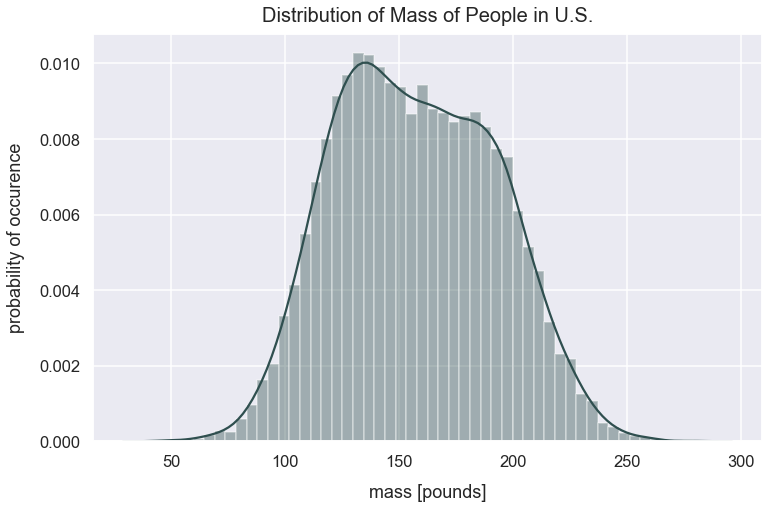

In [6]:
sns.distplot(df_ppl_mass['us_people_mass_pounds'], color="darkslategrey")
plt.xlabel("mass [pounds]", labelpad=14)
plt.ylabel("probability of occurence", labelpad=14)
plt.title("Distribution of Mass of People in U.S.", y=1.015, fontsize=20);

It's tough to characterize this distribution. It's got one large peak around 140 pounds, and it's not a normal distribution since there's no symmetry around a central value.

### Calculate Population Summary Statistics

#### Calculation Population Mean

In [7]:
pop_mean_mass = df_ppl_mass['us_people_mass_pounds'].mean()
pop_mean_mass

157.34328059423373

#### Calculate Population Standard Deviation

In [8]:
pop_std_dev_mass = df_ppl_mass['us_people_mass_pounds'].std()
pop_std_dev_mass

35.06984092088092

### Problem Setup

I later sampled 150 people at the gym on their mass. Their mean mass value is 163 pounds. I'm curious how this compares to our current population of people's mass. In order to compare this new sample of people from the gym, I need to compare it to an equivalent distribution of sample means from our population.

### Create List of Sample Means with $n=25$

Hypothetically, if It's biased to simply select a single sample from our population 

Given our population mass values, I will take 300 samples each of 25 random values with replacement. For each sample, I will calculate the mean of the sample. I store all those sample means in the list `sample_means`.

In [9]:
sample_means = []
n = 25
for sample in range(0, 300):
    # random sampling done with replacement
    sample_values = np.random.choice(a=df_ppl_mass['us_people_mass_pounds'], size=n)    
    sample_mean = np.mean(sample_values)
    sample_means.append(sample_mean)

### View Distribution of Sample Means

Let's view the distribution of these `sample_means` values.

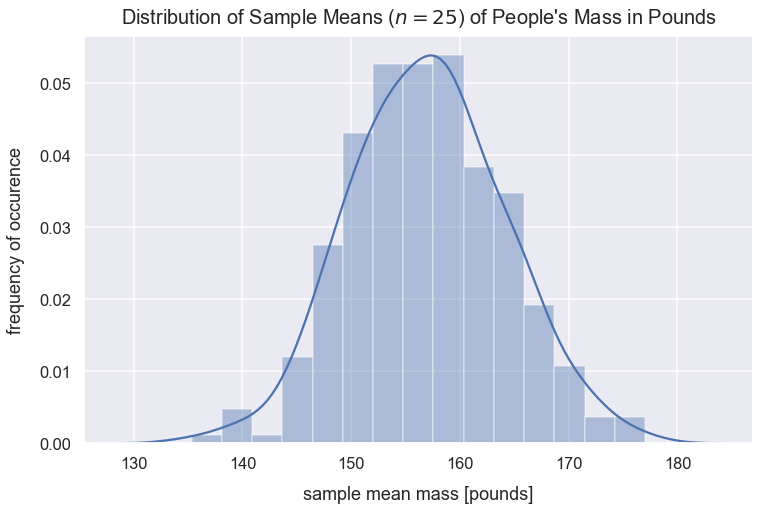

In [10]:
sns.distplot(sample_means)
plt.title("Distribution of Sample Means ($n=25$) of People's Mass in Pounds", y=1.015, fontsize=20)
plt.xlabel("sample mean mass [pounds]", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14);

Wow! This distribution of sample means looks normal! The curve is fairly symmetrical around the central value and the median is roughly equivalent to the mean (see below). Based on the central limit theorem, sampling a sufficient number of times with a sufficient size will result in a normal distribution of sample means.

### Calculate Sampling Distribution ($n=25$) Summary Statistics

#### Calculate Median of Sample Means

In [11]:
median_of_sample_means = np.mean(sample_means)
median_of_sample_means

157.00844996860585

#### Calculate Mean of Sample Means

In [12]:
mean_of_sample_means = np.mean(sample_means)
mean_of_sample_means

157.00844996860585

In [13]:
pop_mean_mass

157.34328059423373

This `mean_of_sample_means` value is roughly equivalent to our population mean value assigned to the variable `pop_mean_mass`. Based on the central limit theorem, this will always be the case!

#### Calculate Standard Deviation of Sample Means

In [14]:
std_dev_of_sample_means = np.std(sample_means)
std_dev_of_sample_means

7.012409180631314

### Equation for Standard Deviation of Sampling Distribution

The standard deviation of sample means is more commonly called the **standard error (SE)**. An interesting tidbit from the central limit theorem is that I can calculate this value off the population standard deviation and sample size. The equation for standard error is:

$$SE=\frac{\sigma }{\sqrt{n}}$$

- $\sigma$ is population standard deviation
- $n$ is sample size

In [15]:
standard_error = pop_std_dev_mass/np.sqrt(n)
standard_error

7.013968184176184

In [16]:
std_dev_of_sample_means

7.012409180631314

This standard error value is the same as the value calculated above for `std_dev_of_sample_means`.

### Compare New Sample Mean to our Sampling Distribution

Let's see how the sample of people from the gym compares to this sampling distribution. Remember, the sample mean of people from the gym was 163 pounds.

This value of 163 is a **point estimate**. I'd naively estimate all samples from this gym would have a mean of 163 pounds. However, if I were to collect additional samples from the gym, I wouldn't expect the mean of the sample means to be *exactly* 163.

In [17]:
gym_sample_mean = 163

#### Visualize Gym Sample Mean Compared to Sampling Distribution

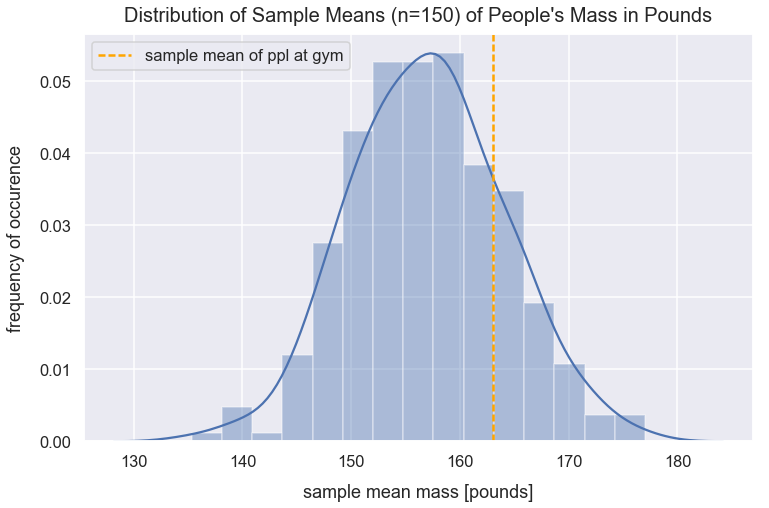

In [18]:
sns.distplot(sample_means)
plt.title("Distribution of Sample Means (n=150) of People's Mass in Pounds", y=1.015, fontsize=20)
plt.axvline(x=gym_sample_mean, linestyle='--', linewidth=2.5, label="sample mean of ppl at gym", c='orange')
plt.xlabel("sample mean mass [pounds]", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14)
plt.legend();

#### Calculate Proportion of Sample Means Less Than Gym Sample Mean

What's the probability of seeing a sample mean with a value less than 163?

Given this new sample mean of people at the gym, I can calculate the number of standard errors this value is from the mean of the sampling distribution. Let's calculate the z-score for `gym_sample_mean`.

I can use the following z-score equation:

$$z=\frac{\bar{x}-\mu}{SE}$$

- $\bar{x}$ is the sample mean
- $\mu$ is the population mean
- $SE$ is the standard error calculated as $\frac{\sigma }{\sqrt{n}}$

In [19]:
z_score = (gym_sample_mean - mean_of_sample_means)/standard_error
z_score

0.8542311390735065

The `cdf()` from the scipy package and accompanying stats module returns the proportion of values smaller than the observation inputted for a normal distribution.

In [20]:
prop_values_less_than_gym_sample_mean =  round(stats.norm.cdf(z_score), 3)
prop_values_less_than_gym_sample_mean

0.804

In [21]:
print("The probability of getting a sample mean less than the gym sample mean is {0}".format(prop_values_less_than_gym_sample_mean))

The probability of getting a sample mean less than the gym sample mean is 0.804


#### Visualize Proportion of Sample Means Less Than Gym Sample Mean

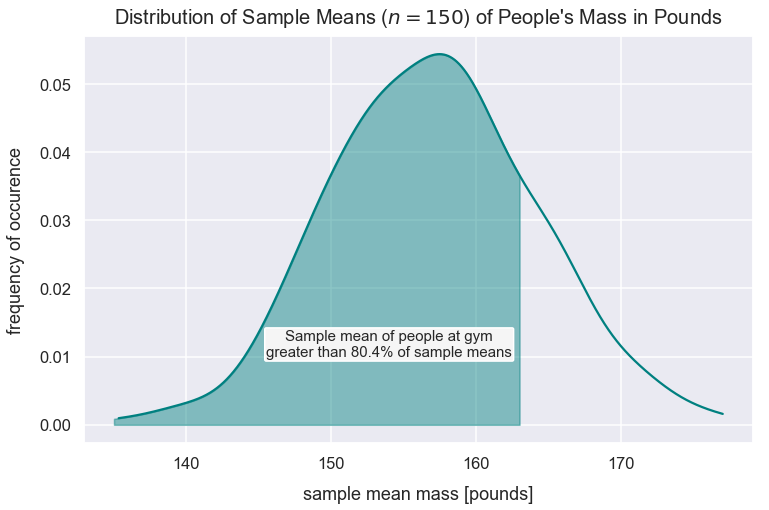

In [22]:
kde = stats.gaussian_kde(sample_means)
pos = np.linspace(np.min(sample_means), np.max(sample_means), 10000)
plt.plot(pos, kde(pos), color='teal')
shade = np.linspace(135, gym_sample_mean, 300)
plt.fill_between(shade, kde(shade), alpha=0.45, color='teal',)
plt.text(x=154, y=.01, horizontalalignment='center', fontsize=15, 
         s="Sample mean of people at gym\ngreater than {0}% of sample means".format(round(prop_values_less_than_gym_sample_mean*100, 2)), 
         bbox=dict(facecolor='whitesmoke', boxstyle="round, pad=0.1"))
plt.title("Distribution of Sample Means ($n=150$) of People's Mass in Pounds", y=1.015, fontsize=20)
plt.xlabel("sample mean mass [pounds]", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14);

### Effect of Sampling Size

Remember the equation for standard error is: 

$$SE=\frac{\sigma }{\sqrt{n}}$$

- $\sigma$ is population standard deviation
- $n$ is sample size

#### Create List of Sample Means with $n=150$

Given this equation, if our $n$ increases, the result is a smaller standard error. Below, from the population of mass values, I take 300 samples each of 150 (instead of previously 25) random values. For each sample, I calculate the mean of the sample and store all these samples means in the list `sample_means_n_150`.

In [23]:
sample_means_n_150 = []
n = 150
for sample in range(0, 300):
    sample_values = np.random.choice(a=df_ppl_mass['us_people_mass_pounds'], size=n)    
    sample_mean = np.mean(sample_values)
    sample_means_n_150.append(sample_mean)

#### View Distribution of Sample Means

In the histogram of `sample_means` below, the distribution is skinner because the standard error is much smaller than when $n=25$.

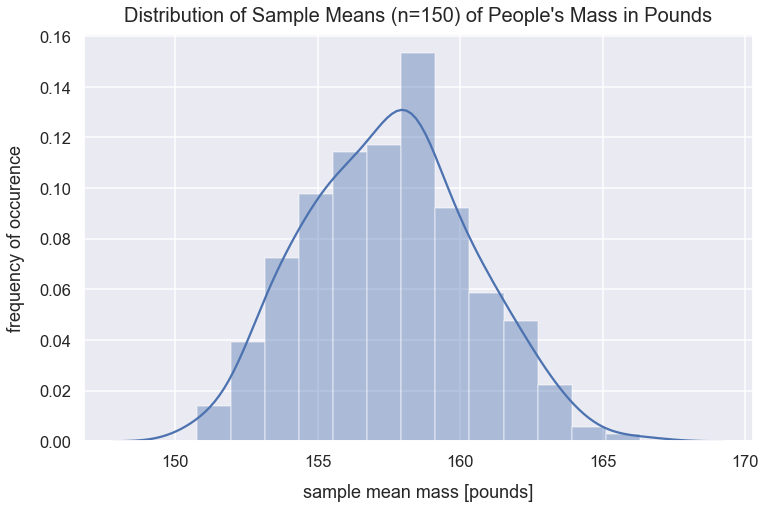

In [24]:
sns.distplot(sample_means_n_150)
plt.title("Distribution of Sample Means (n=150) of People's Mass in Pounds", y=1.015, fontsize=20)
plt.xlabel("sample mean mass [pounds]", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14);

#### Calculate Mean of Sample Means ($n=150$)

In [25]:
mean_of_sample_means_n_150 = np.mean(sample_means)
mean_of_sample_means_n_150

157.00844996860585

#### Calculate Standard Deviation of Sample Means ($n=150$)

In [26]:
std_dev_of_sample_means_n_150 = np.std(sample_means)
std_dev_of_sample_means_n_150

7.012409180631314

This standard error for $n=150$ is much smaller than the standard error for $n=25$.

#### Visualize Distribution of Sample Means for $n=25$ vs. $n=150$

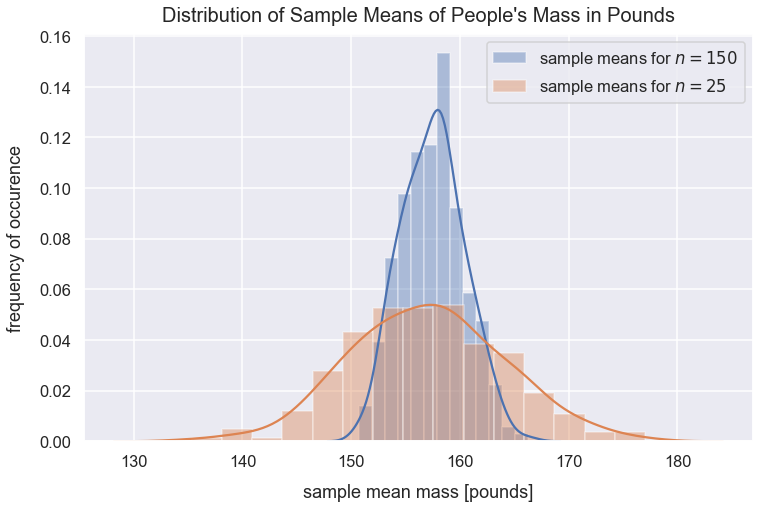

In [27]:
sns.distplot(sample_means_n_150, label="sample means for $n=150$")
sns.distplot(sample_means, label="sample means for $n=25$")
plt.title("Distribution of Sample Means of People's Mass in Pounds", y=1.015, fontsize=20)
plt.xlabel("sample mean mass [pounds]", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14)
plt.legend();

### Create Distribution of Sample Means from Uniform Population Distribution

I want to provide an additional example here to further prove that if I take a sufficient number of samples of sufficient size from any type of distribution, even a uniform distribution, the mean of sample means will be a normal distribution.

#### Create Values in Uniform Distribution

In [28]:
uniform_distribution_values = list(np.random.uniform(low=0, high=20, size=50000))

#### Visualize Uniform Distribution

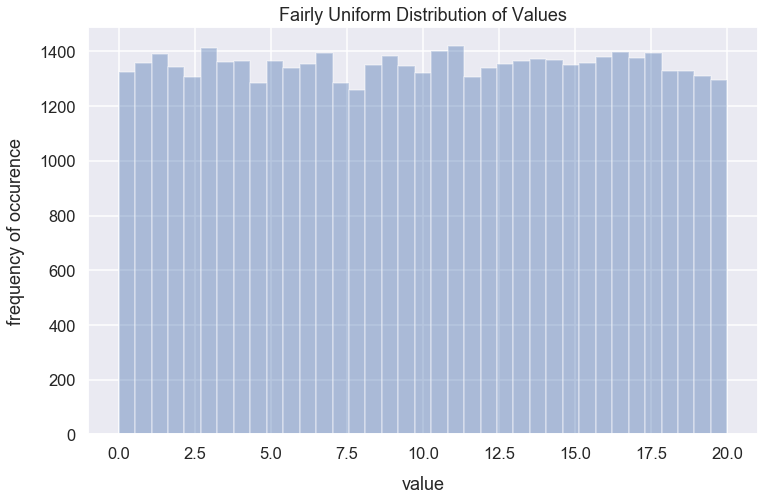

In [29]:
sns.distplot(uniform_distribution_values, kde=False)
plt.title("Fairly Uniform Distribution of Values")
plt.xlabel("value", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14);

#### Calculate Population Mean

In [30]:
population_mean = np.mean(uniform_distribution_values)
population_mean

10.003140880981963

#### Create List of Sample Means with $n=25$

Given our population values that resemble a uniform distribution, I will take 300 samples each of 25 random values. For each sample, I will calculate the mean of the sample. I store all those sample means in the list `sample_means`.

In [31]:
sample_means_from_uniform_distribution = []
n = 25
for sample in range(0, 300):
    sample_values = np.random.choice(a=uniform_distribution_values, size=n)    
    sample_mean = np.mean(sample_values)
    sample_means_from_uniform_distribution.append(sample_mean)

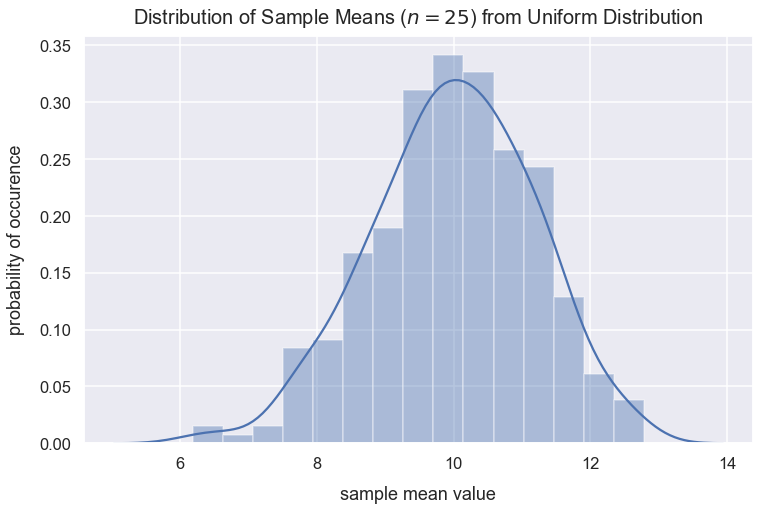

In [32]:
sns.distplot(sample_means_from_uniform_distribution)
plt.title("Distribution of Sample Means ($n=25$) from Uniform Distribution", y=1.015, fontsize=20)
plt.xlabel("sample mean value", labelpad=14)
plt.ylabel("probability of occurence", labelpad=14);

Indeed this looks like a normal distribution!